In [4]:
# Step 1: Install required packages if not already done
# Run in terminal:
# pip install transformers datasets evaluate rouge-score

from transformers import BartTokenizer, BartForConditionalGeneration
from datasets import load_dataset
import evaluate

# ✅ Load trained BART model
model_path = "bart_arxiv_30k_model"  # Replace with your actual folder name
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# ✅ Load the test split of the dataset directly from Hugging Face
dataset = load_dataset("ccdv/arxiv-summarization")
test_data = dataset["test"]  # this is loaded online the first time

# ✅ Summary generation function
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(**inputs, max_new_tokens=128)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# ✅ Test with a single sample
sample_idx = 0
article = test_data[sample_idx]["article"]
reference_summary = test_data[sample_idx]["abstract"]
predicted_summary = generate_summary(article)

# ✅ Print results
print("\n📄 Article (truncated):\n", article[:1000], "...\n")
print("🧠 Predicted Summary:\n", predicted_summary, "\n")
print("✅ Reference Summary:\n", reference_summary, "\n")

# ✅ Compute ROUGE
rouge = evaluate.load("rouge")
scores = rouge.compute(predictions=[predicted_summary], references=[reference_summary])

print("📊 ROUGE Evaluation:")
for key, value in scores.items():
    print(f"{key}: {value:.4f}")


C:\Users\kandi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kandi\.cache\huggingface\hub\datasets--ccdv--arxiv-summarization. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split


📄 Article (truncated):
 for about 20 years the problem of properties of short - term changes of solar activity has been considered extensively . 
 many investigators studied the short - term periodicities of the various indices of solar activity . 
 several periodicities were detected , but the periodicities about 155 days and from the interval of @xmath3 $ ] days ( @xmath4 $ ] years ) are mentioned most often . 
 first of them was discovered by @xcite in the occurence rate of gamma - ray flares detected by the gamma - ray spectrometer aboard the _ solar maximum mission ( smm ) . 
 this periodicity was confirmed for other solar flares data and for the same time period @xcite . 
 it was also found in proton flares during solar cycles 19 and 20 @xcite , but it was not found in the solar flares data during solar cycles 22 @xcite . 
 _    several autors confirmed above results for the daily sunspot area data . @xcite studied the sunspot data from 18741984 . 
 she found the 155-day periodi

📊 ROUGE Evaluation:
rouge1: 0.3173
rouge2: 0.1264
rougeL: 0.2066
rougeLsum: 0.2878


In [2]:
!pip install transformers datasets evaluate rouge-score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   -- ------------------------------------- 1.3/25.8 MB 7.4 MB/s eta 0:00:04
   ---- ----------------------------------- 3.1/25.8 MB 7.7 MB/s eta 0:00:03
   ------ --------------------------------- 4.5/25.8 MB 6.9 MB/s eta 0:00:04
   --------- ------------------------------ 6.0/25.8 MB 7.1 MB/s eta 0:00:03
   ----------- ---------------------------- 7.6/25.8 MB 7.1 MB/s eta 0:00:03
   -------------- ------------------------- 9.2/25.8 MB 7.1 MB/s eta 0:00:03
   ---------------- ----------------------- 10.7/25.8 MB 7.2 MB/s eta 0:00:03
   ------------------- -------------------- 12.3/25.8 MB 7.2 MB/s eta 0:00:02
   --------------------- ------------------ 13.6/25.8 MB 7.1 MB/s eta 0:00:02
   ----------------------- ---------------- 15.2/25.8 MB 7.2 MB/s eta 0:00:02
   ------------------------- -------------- 16.3/25.8 

  DEPRECATION: Building 'rouge-score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge-score'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [7]:
import evaluate

# 🔹 Load metrics
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")
bertscore = evaluate.load("bertscore")

# 🔹 Lists of predictions and references (for multiple samples)
predictions = [predicted_summary]
references = [reference_summary]

# 🔹 Compute ROUGE
rouge_scores = rouge.compute(predictions=predictions, references=references)

# 🔹 Compute METEOR
meteor_score = meteor.compute(predictions=predictions, references=references)

# 🔹 Compute BERTScore
bert_score = bertscore.compute(predictions=predictions, references=references, lang="en")

# 🔹 Print All Scores
print("\n📊 ROUGE Scores:")
for k, v in rouge_scores.items():
    print(f"{k}: {v:.4f}")

print(f"\n📘 METEOR Score: {meteor_score['meteor']:.4f}")

print("\n🤖 BERTScore (Semantic Similarity):")
print(f"Precision: {bert_score['precision'][0]:.4f}")
print(f"Recall:    {bert_score['recall'][0]:.4f}")
print(f"F1 Score:  {bert_score['f1'][0]:.4f}")


[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\kandi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kandi\.cache\huggingface\hub\models--roberta-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-


📊 ROUGE Scores:
rouge1: 0.3173
rouge2: 0.1264
rougeL: 0.2066
rougeLsum: 0.2878

📘 METEOR Score: 0.1707

🤖 BERTScore (Semantic Similarity):
Precision: 0.8652
Recall:    0.8462
F1 Score:  0.8556


In [6]:
!pip install bert_score

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



🔁 Generating summaries and evaluating 100 test samples...



  0%|          | 0/100 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 100/100 [13:01<00:00,  7.81s/it]


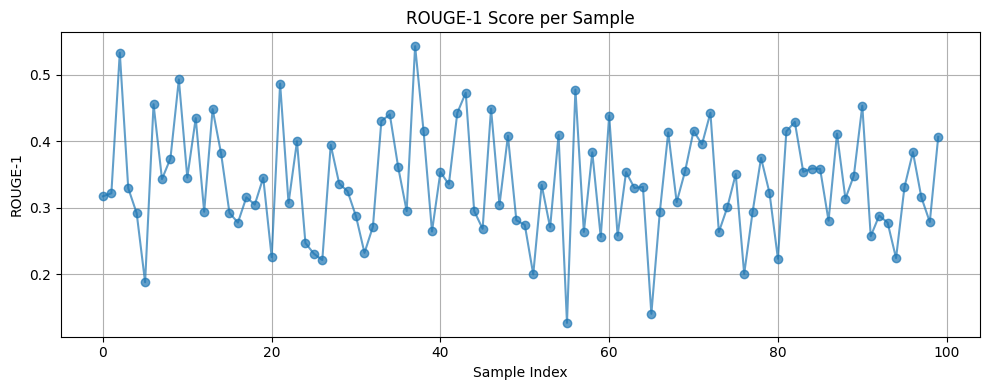

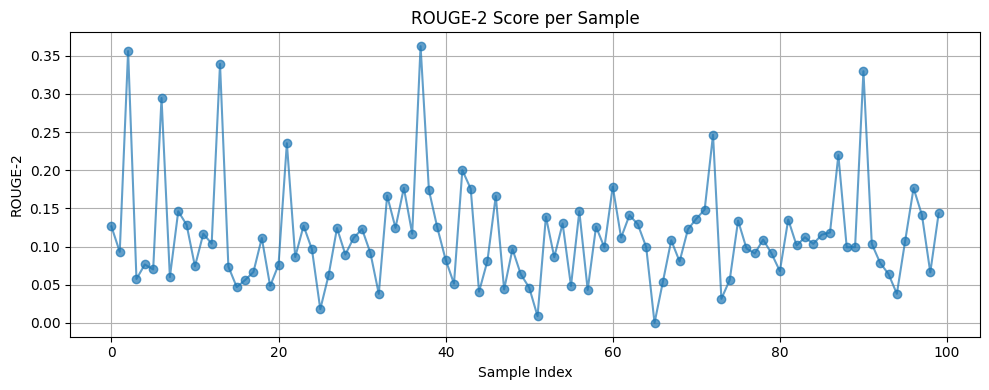

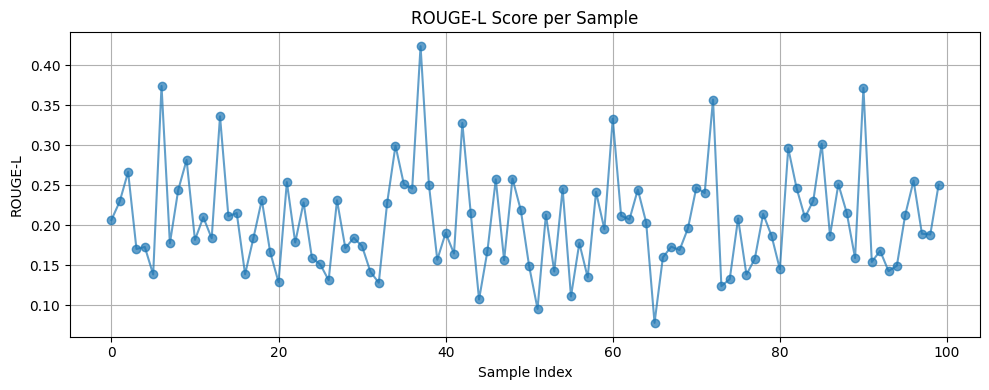

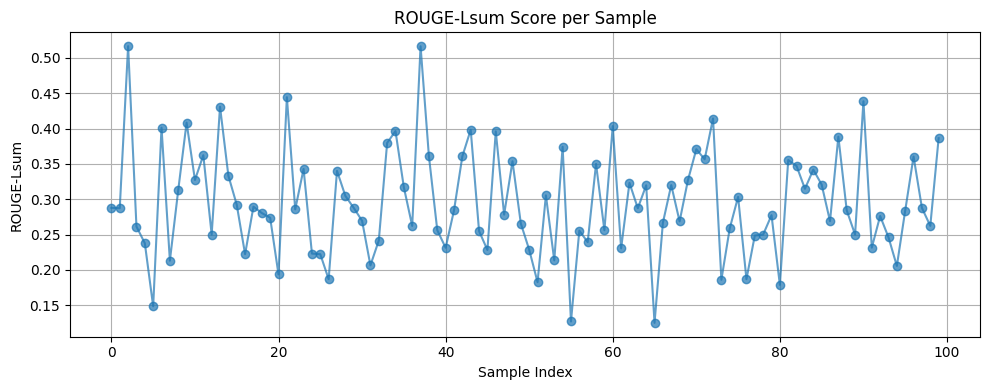

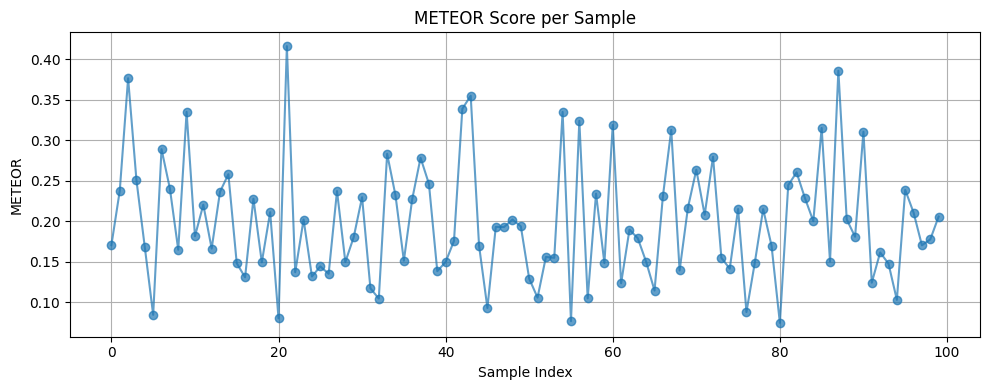

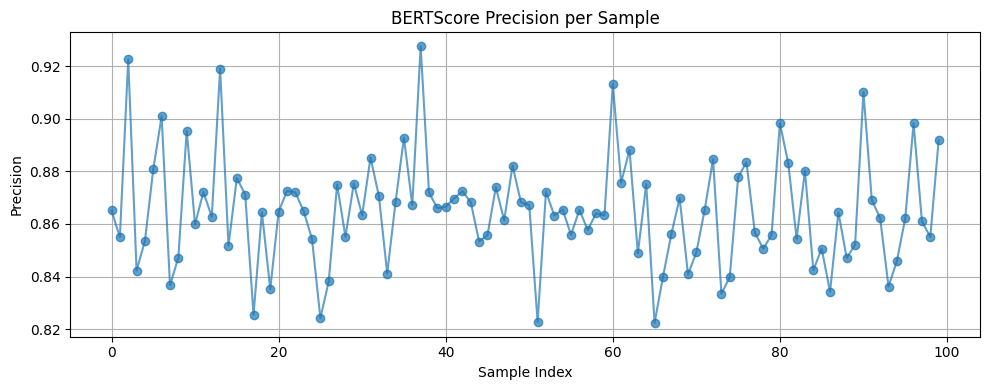

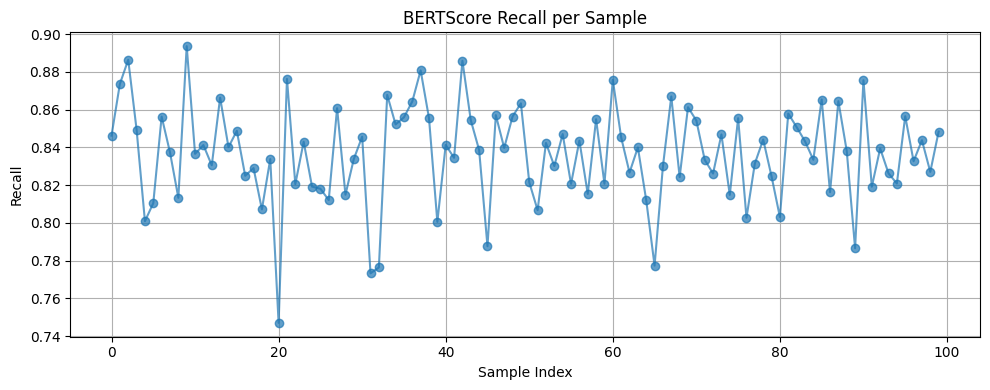

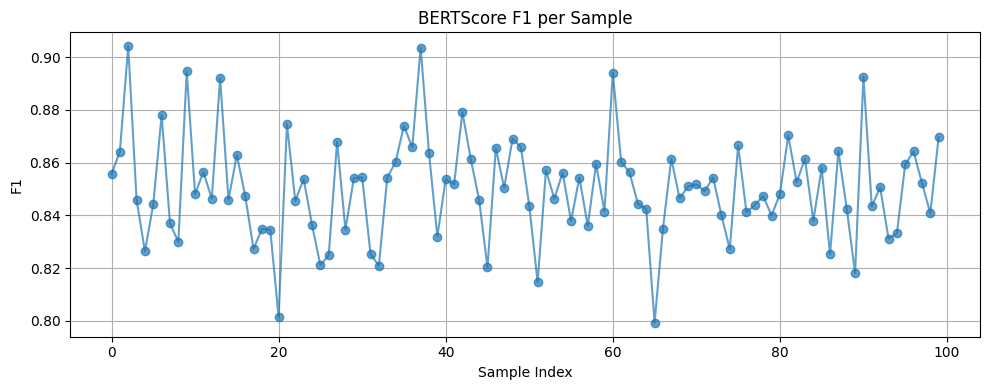


📊 Final Average Evaluation Scores (100 Samples):

🔹 ROUGE:
ROUGE-1:     0.3371
ROUGE-2:     0.1143
ROUGE-L:     0.2053
ROUGE-Lsum:  0.2951

🔹 METEOR:   0.1987

🔹 BERTScore:
Precision:   0.8648
Recall:      0.8365
F1 Score:    0.8502


In [9]:
from transformers import BartTokenizer, BartForConditionalGeneration
from datasets import load_dataset
import evaluate
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load model and tokenizer
model_path = "bart_arxiv_30k_model"  # Update if needed
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# Load dataset
dataset = load_dataset("ccdv/arxiv-summarization")
test_data = dataset["test"]

# Load metrics
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")
bertscore = evaluate.load("bertscore")

# Storage
predictions, references = [], []
rouge_1s, rouge_2s, rouge_Ls, rouge_Lsums = [], [], [], []
meteor_scores = []
bert_precisions, bert_recalls, bert_f1s = [], [], []

N = 100
print(f"\n🔁 Generating summaries and evaluating {N} test samples...\n")

# Loop and collect metrics
for i in tqdm(range(N)):
    article = test_data[i]["article"]
    reference = test_data[i]["abstract"]

    inputs = tokenizer(article, return_tensors="pt", truncation=True, max_length=512)
    summary_ids = model.generate(**inputs, max_new_tokens=128)
    pred = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    predictions.append(pred)
    references.append(reference)

    # Individual scores
    rouge_result = rouge.compute(predictions=[pred], references=[reference])
    rouge_1s.append(rouge_result["rouge1"])
    rouge_2s.append(rouge_result["rouge2"])
    rouge_Ls.append(rouge_result["rougeL"])
    rouge_Lsums.append(rouge_result["rougeLsum"])

    meteor_result = meteor.compute(predictions=[pred], references=[reference])
    meteor_scores.append(meteor_result["meteor"])

    bert_result = bertscore.compute(predictions=[pred], references=[reference], lang="en")
    bert_precisions.append(bert_result["precision"][0])
    bert_recalls.append(bert_result["recall"][0])
    bert_f1s.append(bert_result["f1"][0])

# ---- PLOT SECTION ----
def plot_metric(metric_list, title, ylabel):
    plt.figure(figsize=(10, 4))
    plt.plot(range(N), metric_list, marker='o', linestyle='-', alpha=0.7)
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ROUGE plots
plot_metric(rouge_1s, "ROUGE-1 Score per Sample", "ROUGE-1")
plot_metric(rouge_2s, "ROUGE-2 Score per Sample", "ROUGE-2")
plot_metric(rouge_Ls, "ROUGE-L Score per Sample", "ROUGE-L")
plot_metric(rouge_Lsums, "ROUGE-Lsum Score per Sample", "ROUGE-Lsum")

# METEOR plot
plot_metric(meteor_scores, "METEOR Score per Sample", "METEOR")

# BERTScore plots
plot_metric(bert_precisions, "BERTScore Precision per Sample", "Precision")
plot_metric(bert_recalls, "BERTScore Recall per Sample", "Recall")
plot_metric(bert_f1s, "BERTScore F1 per Sample", "F1")

# ---- PRINT AVERAGE SCORES ----
print("\n📊 Final Average Evaluation Scores (100 Samples):")

print("\n🔹 ROUGE:")
print(f"ROUGE-1:     {sum(rouge_1s)/N:.4f}")
print(f"ROUGE-2:     {sum(rouge_2s)/N:.4f}")
print(f"ROUGE-L:     {sum(rouge_Ls)/N:.4f}")
print(f"ROUGE-Lsum:  {sum(rouge_Lsums)/N:.4f}")

print(f"\n🔹 METEOR:   {sum(meteor_scores)/N:.4f}")

print("\n🔹 BERTScore:")
print(f"Precision:   {sum(bert_precisions)/N:.4f}")
print(f"Recall:      {sum(bert_recalls)/N:.4f}")
print(f"F1 Score:    {sum(bert_f1s)/N:.4f}")
